In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load hotel data

In [2]:
df=pd.read_csv("hotel_bookings.csv",encoding="latin-1")

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [4]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
df["agent"].isnull().sum()

16340

## Data Cleaning

In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
df["stays_in_weekend_nights"].value_counts()

stays_in_weekend_nights
0     51998
2     33308
1     30626
4      1855
3      1259
6       153
5        79
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: count, dtype: int64

In [8]:
rows_to_drop = df[(df["children"] == 0) & (df["adults"] == 0) & (df["babies"] == 0)].index

In [9]:
df = df.drop(rows_to_drop)

In [10]:
df["meal"].value_counts()

meal
BB           92236
HB           14458
SC           10549
Undefined     1169
FB             798
Name: count, dtype: int64

In [11]:
df["meal"]=df["meal"].str.replace("Undefined","SC")

In [12]:
df["meal"].value_counts()

meal
BB    92236
HB    14458
SC    11718
FB      798
Name: count, dtype: int64

In [13]:
df["country"].isna().value_counts()

country
False    118732
True        478
Name: count, dtype: int64

In [14]:
df["country"].value_counts()

country
PRT    48483
GBR    12120
FRA    10401
ESP     8560
DEU     7285
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64

In [15]:
df["country"] = df["country"].fillna("PRT")

In [16]:
df["country"].isna().value_counts()

country
False    119210
Name: count, dtype: int64

In [17]:
df["market_segment"].value_counts()

market_segment
Online TA        56408
Offline TA/TO    24182
Groups           19791
Direct           12582
Corporate         5282
Complementary      728
Aviation           235
Undefined            2
Name: count, dtype: int64

In [18]:
df["market_segment"]=df["market_segment"].str.replace("Undefined","Online TA")

In [19]:
df["market_segment"].value_counts()

market_segment
Online TA        56410
Offline TA/TO    24182
Groups           19791
Direct           12582
Corporate         5282
Complementary      728
Aviation           235
Name: count, dtype: int64

In [20]:
df["distribution_channel"].value_counts()

distribution_channel
TA/TO        97750
Direct       14611
Corporate     6651
GDS            193
Undefined        5
Name: count, dtype: int64

In [21]:
df["distribution_channel"]=df["distribution_channel"].str.replace("Undefined","TA/TO")

In [22]:
df["distribution_channel"].value_counts()

distribution_channel
TA/TO        97755
Direct       14611
Corporate     6651
GDS            193
Name: count, dtype: int64

In [23]:
df["is_repeated_guest"].value_counts()

is_repeated_guest
0    115455
1      3755
Name: count, dtype: int64

In [24]:
df["previous_cancellations"].value_counts()

previous_cancellations
0     112731
1       6048
2        114
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: count, dtype: int64

In [25]:
df["previous_bookings_not_canceled"].value_counts()

previous_bookings_not_canceled
0     115597
1       1538
2        580
3        333
4        229
       ...  
47         1
49         1
50         1
51         1
72         1
Name: count, Length: 73, dtype: int64

In [26]:
s=df["agent"].isnull()

In [27]:
s.value_counts()

agent
False    102930
True      16280
Name: count, dtype: int64

In [28]:
df["agent"]=df["agent"].fillna(0)

In [29]:
df["company"].isnull().value_counts()

company
True     112442
False      6768
Name: count, dtype: int64

In [30]:
df["company"]=df["company"].fillna(0)

In [31]:
df["reservation_status_date"]=pd.to_datetime(df["reservation_status_date"])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119210 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119210 non-null  object        
 1   is_canceled                     119210 non-null  int64         
 2   lead_time                       119210 non-null  int64         
 3   arrival_date_year               119210 non-null  int64         
 4   arrival_date_month              119210 non-null  object        
 5   arrival_date_week_number        119210 non-null  int64         
 6   arrival_date_day_of_month       119210 non-null  int64         
 7   stays_in_weekend_nights         119210 non-null  int64         
 8   stays_in_week_nights            119210 non-null  int64         
 9   adults                          119210 non-null  int64         
 10  children                        119206 non-null  float64     

In [33]:
df = df[df["adr"] != 5400.0]


## How have hotel bookings changed each year?
Investigate sudden drops or spikes in bookings


In [34]:
year_booking=df['arrival_date_year'].value_counts().sort_index()

In [35]:
year_booking=year_booking.reset_index(name="values")

In [36]:
year_booking

,arrival_date_year,values
0,2015,21967
1,2016,56622
2,2017,40620


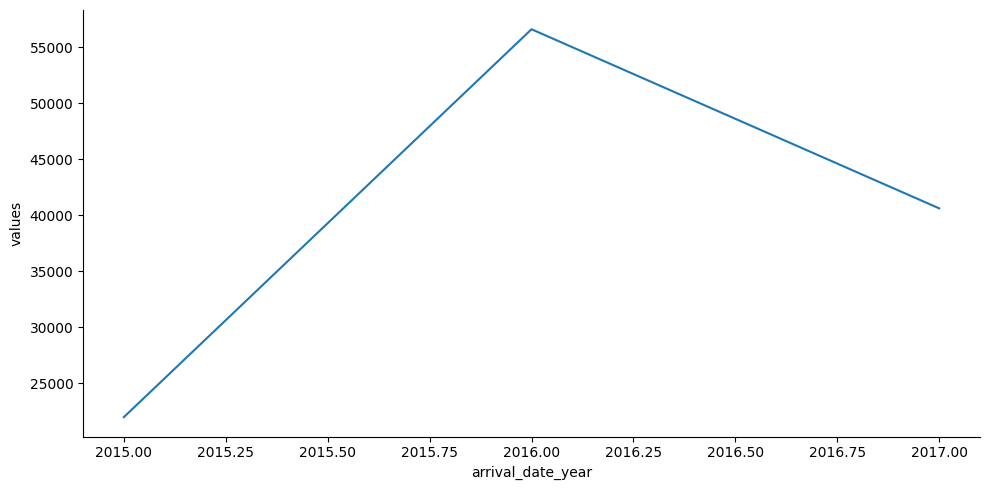

In [37]:
sns.relplot(data=year_booking,x="arrival_date_year",y="values",kind="line",aspect=2)

## Is there a relationship between how early customers book (lead_time) and how much they pay per night (adr)?

Helps identify if customers who book early pay more or less.
May reveal pricing strategies or customer behavior patterns for each hotel.

In [38]:
q=df[(df["lead_time"] > 0) & (df["adr"] > 0)]

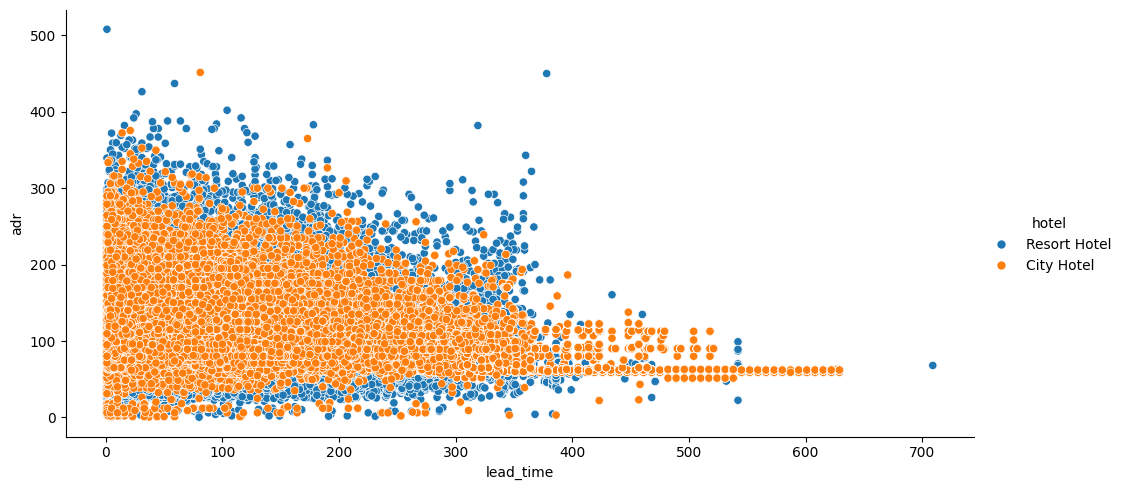

In [39]:
sns.relplot(data=q, x='lead_time', y='adr',aspect=2,hue="hotel")

## Which meal plan is most commonly chosen by hotel guests?

Focus on the most preferred meal plan (e.g., offer combos or promotions).
Discontinue or improve underperforming plans.
Plan inventory and staff accordingly for food service.

<Axes: xlabel='meal', ylabel='Count'>

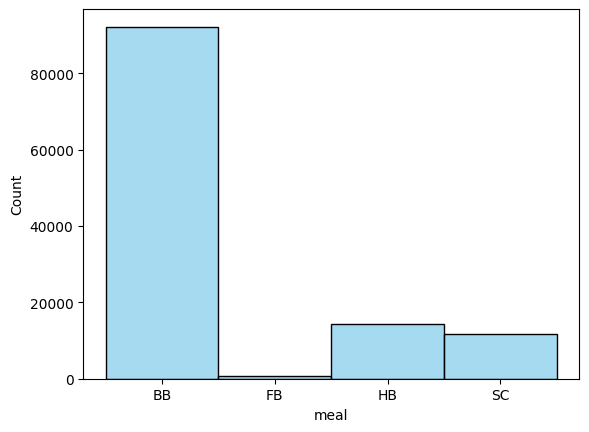

In [40]:
sns.histplot(df['meal'], color='skyblue')

## What is the price variation for different room types, and are some room types priced higher on average?
Adjust pricing strategy per room type.
Promote or upgrade underbooked room types.
Balance room availability based on profitability.

C:\Users\Dell\AppData\Local\Temp\ipykernel_4956\634079232.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='reserved_room_type', y='adr', jitter=True, alpha=0.5, palette="Set2")


<Axes: xlabel='reserved_room_type', ylabel='adr'>

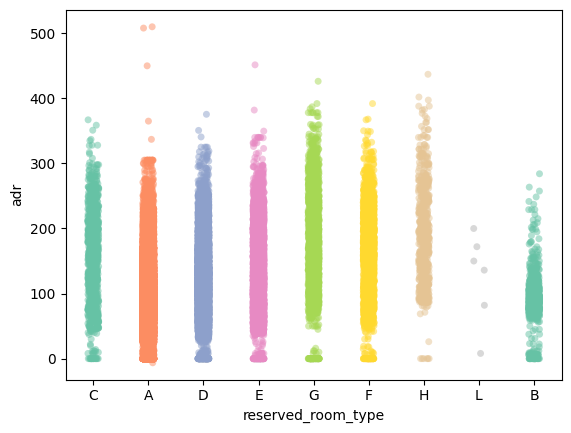

In [41]:
sns.stripplot(data=df, x='reserved_room_type', y='adr', jitter=True, alpha=0.5, palette="Set2")

## What is the most common price range for rooms, and how are room rates distributed overall?
Helps in pricing strategy: set competitive yet profitable rates.
Understand guest affordability range.
Detect anomalous pricing or promotions that spiked prices.

<Axes: xlabel='adr', ylabel='Density'>

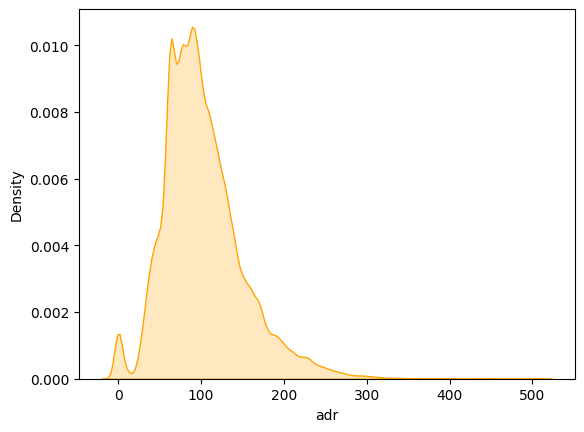

In [42]:
sns.kdeplot(df['adr'], fill=True, color='orange')

## How do room prices vary by room type and hotel category?
Adjust prices of specific room types based on hotel type and customer willingness to pay.
Promote underbooked room types with good ADR potential.
Optimize revenue by aligning pricing with market demand.

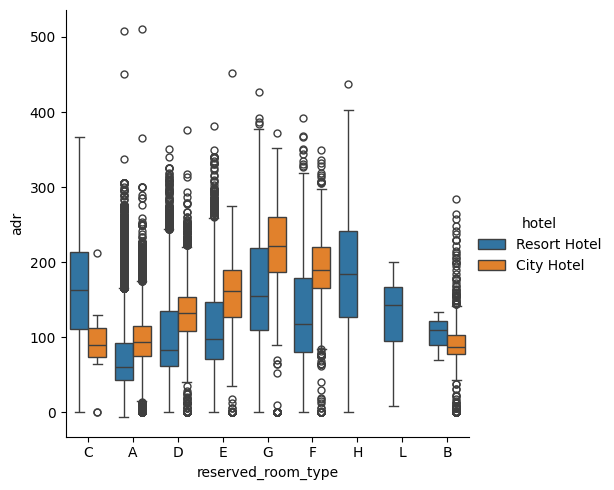

In [43]:
sns.catplot(data=df,x="reserved_room_type",y="adr",kind="box" ,hue = 'hotel')

## How do different types of customers impact room pricing across hotels?
Tailor pricing strategies for each customer segment.
Offer targeted discounts to specific customer types to maximize revenue.
Understand which customer segments bring in higher profits.

In [44]:
df[df['adr']>500]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
15083,Resort Hotel,0,1,2015,July,29,15,0,1,2,...,No Deposit,0.0,0.0,0,Transient,508.0,1,0,Check-Out,2015-07-16
111403,City Hotel,0,0,2017,May,19,9,0,1,1,...,No Deposit,159.0,0.0,0,Transient,510.0,0,0,Check-Out,2017-05-10


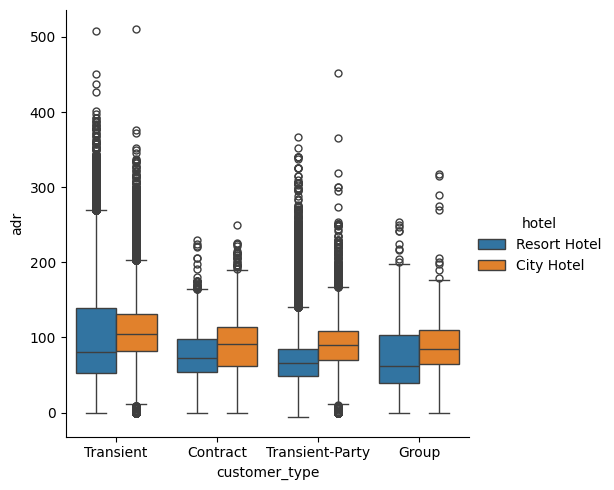

In [45]:
sns.catplot(data=df,y="adr",x="customer_type",kind="box",hue="hotel")

## How far in advance do guests book rooms in different months, and does this vary by hotel type?
Plan marketing and promotions based on when guests book.
Allocate staff and resources earlier in high lead-time months.
Understand customer behavior to improve dynamic pricing models.

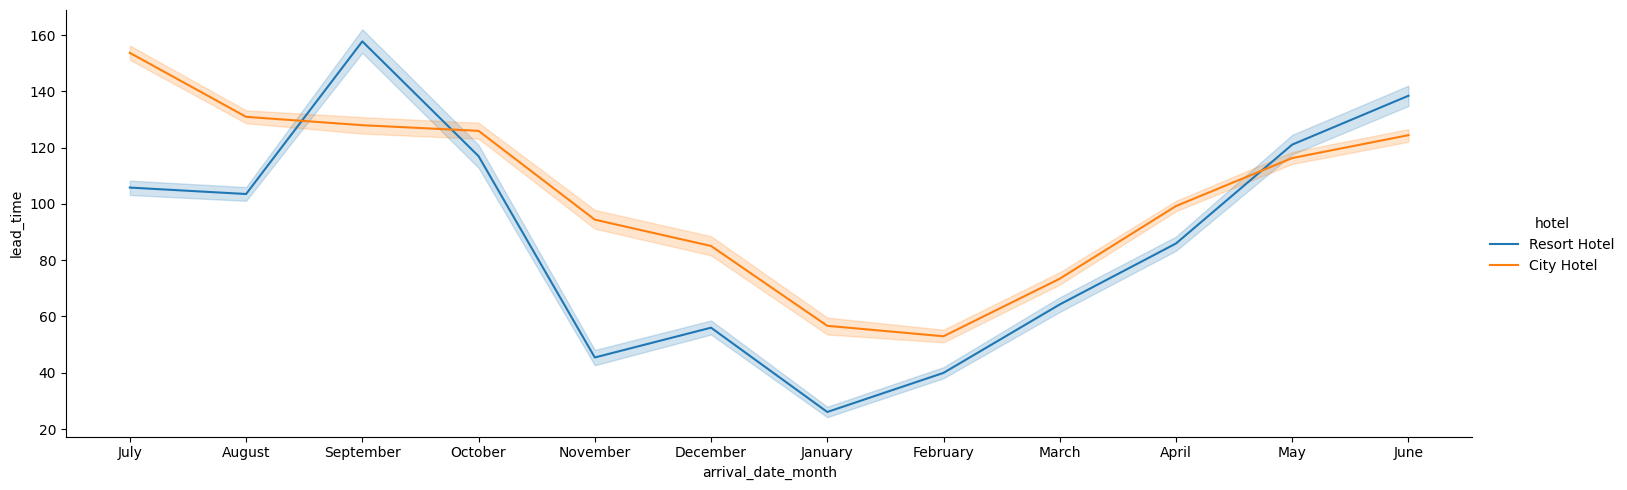

In [46]:
sns.relplot(data=df,x="arrival_date_month",y="lead_time",kind="line",aspect=3,hue="hotel")

In [47]:
sst=df[df['is_canceled']==1]["arrival_date_month"].value_counts().sort_values()

In [48]:
sst=sst.reset_index(name="canceled_data")

In [49]:
sst

,arrival_date_month,canceled_data
0,January,1806
1,November,2120
2,December,2368
3,February,2693
4,March,3147
5,September,4115
6,October,4246
7,April,4518
8,June,4534
9,May,4677


## In which months do guests cancel bookings the most?
Helps plan cancellation policies or non-refundable discounts during high-risk months.
Improve booking flexibility or offers in months with many cancellations.
Adjust inventory and staffing to minimize the impact of cancellations.

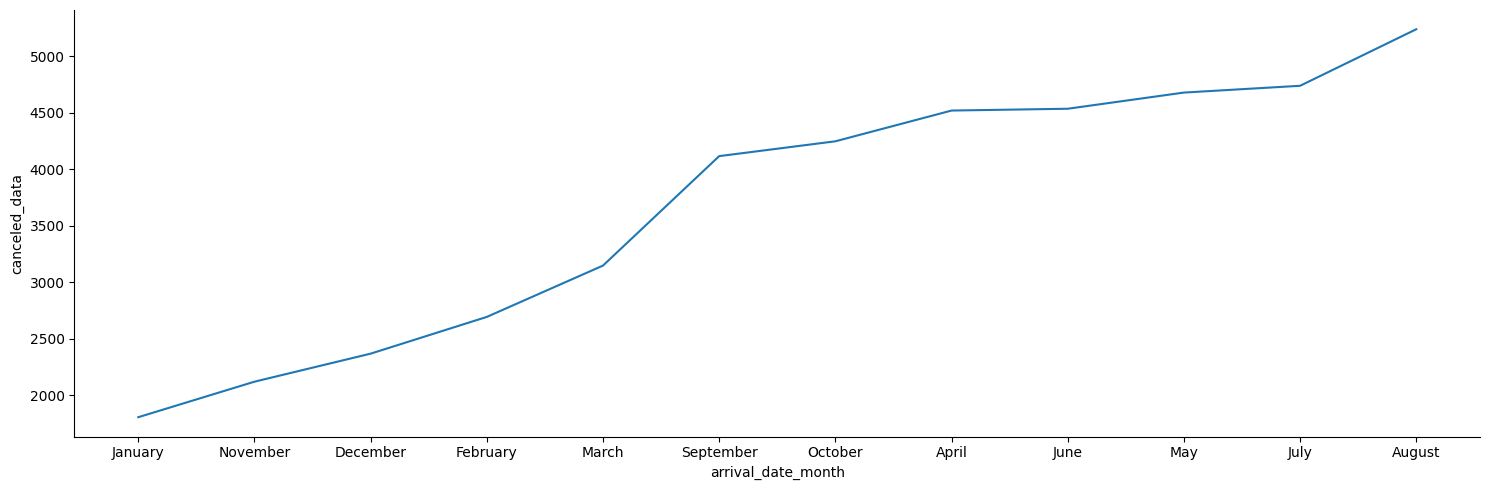

In [50]:
sns.relplot(data=sst,x="arrival_date_month",y="canceled_data",kind="line",aspect=3)

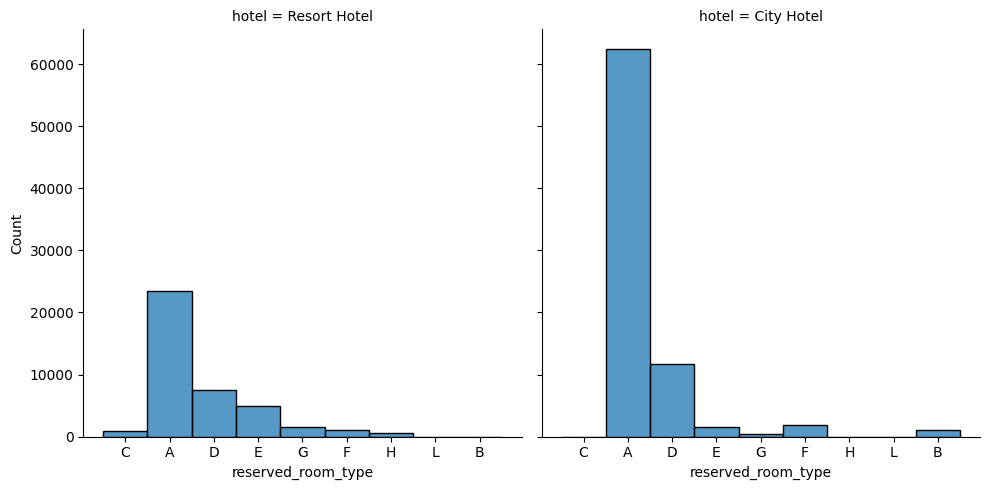

In [51]:
sns.displot(data=df,x="reserved_room_type",kind="hist",col="hotel")

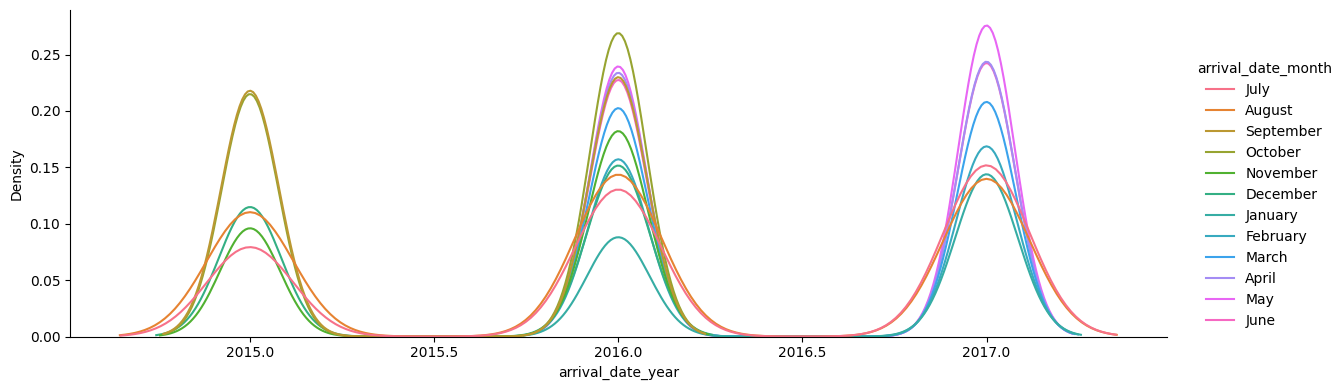

In [52]:
sns.displot(data=df,x="arrival_date_year",kind="kde",hue="arrival_date_month",aspect=3,height=4)

In [53]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [64]:
per_date_month=df["reservation_status"].value_counts()
per_date_month

reservation_status
Check-Out    75011
Canceled     42992
No-Show       1206
Name: count, dtype: int64

In [81]:
heat_data = pd.crosstab(df["arrival_date_month"], df["reservation_status"])

In [82]:
heat_data_percent = heat_data.div(heat_data.sum(axis=1), axis=0) * 100

<Axes: xlabel='reservation_status', ylabel='arrival_date_month'>

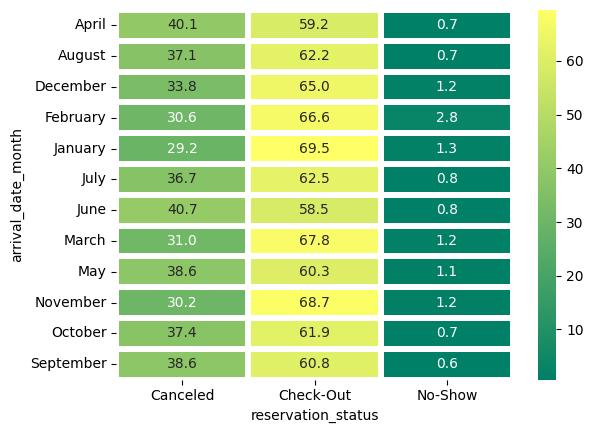

In [83]:
sns.heatmap(heat_data_percent,annot=True,fmt=".1f",cmap="summer",linewidths=3)